In [89]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

In [90]:

df= pd.read_csv('insurance.csv')
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [91]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [93]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [94]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [95]:
fig = px.histogram(df ,
                   x  = 'bmi',
                   marginal= 'box', 
                   color_discrete_sequence = ['red'],
                   title = "Distributon of BMI  (body max index)")
fig.update_layout(bargap= 0.1)
fig.show()

In [96]:
fig = px.histogram(df , x = 'expenses'  ,marginal = 'box' , color = 'smoker' , color_discrete_sequence=['green' , 'grey'] , title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [97]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [98]:
px.histogram(df , x='smoker' , color = 'sex' , title = 'smoker')

In [99]:
fig = px.scatter(df , x = 'bmi' , y = 'expenses' , color = 'smoker' , opacity= 0.8 , hover_data= ['sex'], title='BMI vs EXPENSE')
fig.update_traces(marker_size=5)
fig.show()

In [100]:
df.expenses.corr(df.bmi)

0.198576255018932

In [101]:
smoke_value = {'no' : 0 , 'yes': 1}
smoke_numeric = df.smoker.map(smoke_value)
df.expenses.corr(smoke_numeric)

0.7872514298985536

Text(0.5, 1.0, 'Correlation matrix')

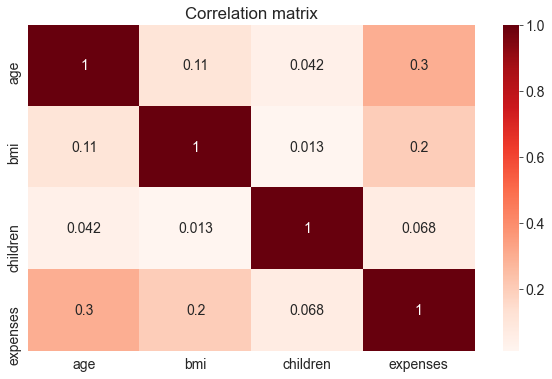

In [102]:
sns.heatmap(df.corr() , cmap="Reds" , annot = True)
plt.title("Correlation matrix")

<AxesSubplot:title={'center':'age vs charges'}, xlabel='age', ylabel='expenses'>

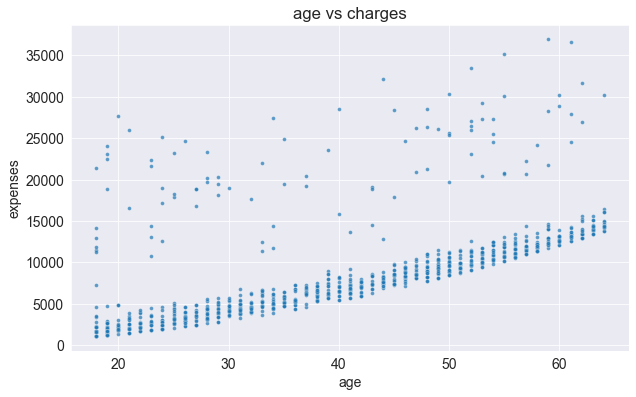

In [103]:
non_smoker_df = df[df.smoker == 'no']
plt.title('age vs charges')
sns.scatterplot(data= non_smoker_df , x= 'age' , y = 'expenses' , alpha =0.7 , s = 15)

In [104]:
def estimate_charges(age, w, b):
    return w * age + b

In [105]:
def try_parameters(w ,b):
    ages = non_smoker_df.age
    target = non_smoker_df.expenses
    
    estimated_expenses = estimate_expenses(ages, w, b)
    
    plt.plot(ages, estimated_expenses , 'r' , alpha = 0.9)
    plt.scatter(ages ,target , s = 8 , alpha = 0.8)
    plt.xlabel('age')
    plt.ylabel('expenses')
    plt.legend(['estimated' ,  'actual'])

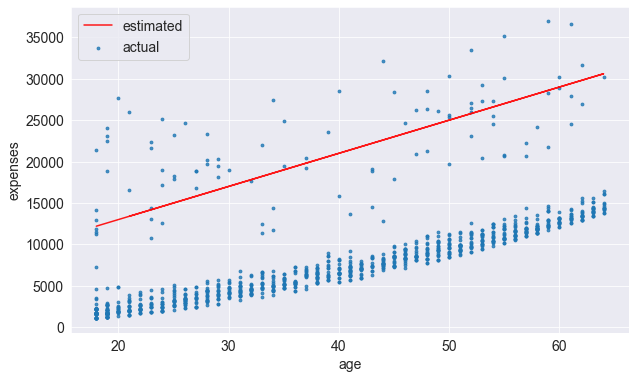

In [106]:
try_parameters(400, 5000)

In [107]:
import numpy as np

In [108]:
def rmse(targets , predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [109]:
w = 50
b = 100

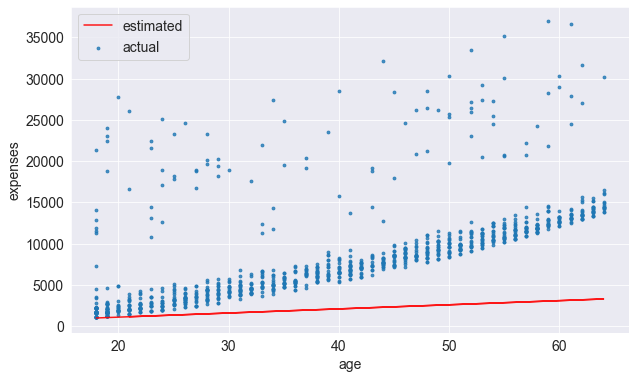

In [110]:
try_parameters(w, b)

In [111]:
targets= non_smoker_df['expenses']
predicted = estimate_charges(non_smoker_df.age, w, b)


In [112]:
rmse(targets, predicted)

8461.94962740416

In [115]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.expenses
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  18174.874800546004


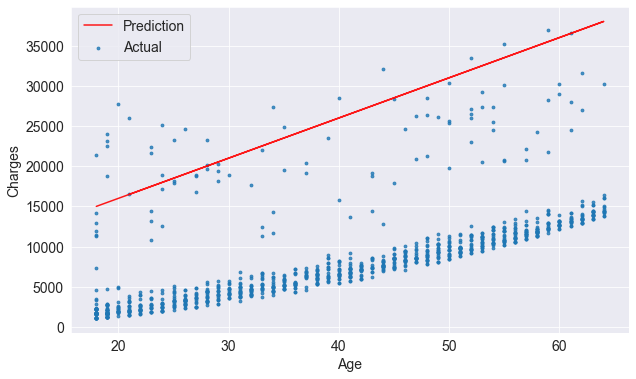

In [118]:
try_parameters(500, 6000)

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

inputs = non_smoker_df[['age']]
targets = non_smoker_df.expenses
input.shape , targets.shape

((1064, 1), (1064,))

In [125]:
model.fit(inputs , targets)

LinearRegression()

In [128]:
predictions=  model.predict(inputs)

In [129]:
predictions

array([2719.05994381, 5391.54911046, 6727.79369378, ..., 2719.05994381,
       2719.05994381, 3520.8066938 ])

In [130]:
rmse(targets, predictions)


4662.505642227753

In [132]:
model.coef_

array([267.24891666])

In [133]:
model.intercept_

-2091.42055615141

RMSE Loss:  4662.505642227753


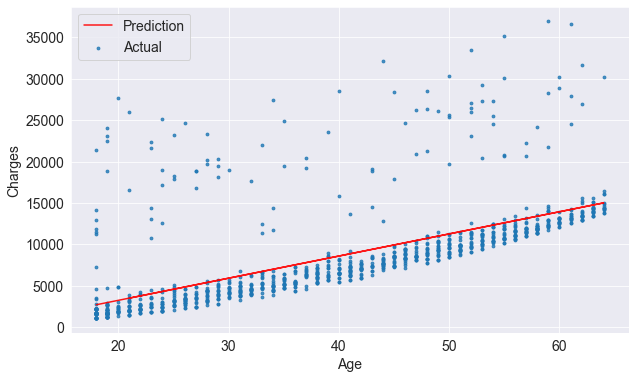

In [134]:
try_parameters(model.coef_, model.intercept_)

In [136]:
inputs, targets = non_smoker_df[['age']], non_smoker_df['expenses']
model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505642227753


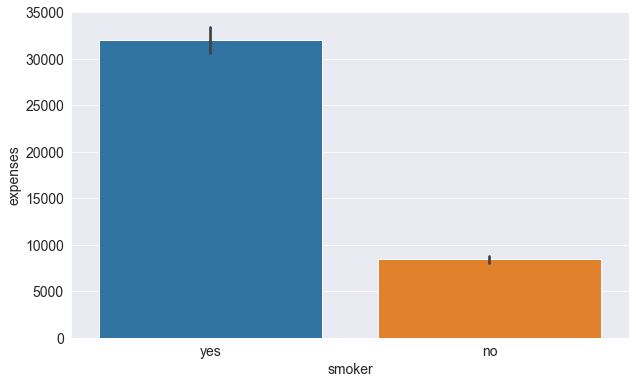

In [139]:
sns.barplot(data=df, x='smoker', y='expenses');

In [140]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [142]:
df.expenses.corr(df.smoker_code)


0.7872514298985536

In [143]:
inputs, targets = df[['age', 'bmi', 'children', 'smoker_code']], df['expenses']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.25392250329


In [144]:
from sklearn.preprocessing import StandardScaler

In [147]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [149]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.4536457 , -0.90861367],
       [-1.50996545,  0.51418574, -0.07876719],
       [-0.79795355,  0.38295436,  1.58092576],
       ...,
       [-1.50996545,  1.02270734, -0.90861367],
       [-1.29636188, -0.79812808, -0.90861367],
       [ 1.55168573, -0.25679863, -0.90861367]])